<a href="https://colab.research.google.com/github/JK-the-Ko/Thermo-Fluid-Dynamics-Experiment/blob/main/2022-2/%EC%97%B4%EC%9C%A0%EC%B2%B4%EA%B3%B5%ED%95%99%EC%8B%A4%ED%97%98_Week_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data Analysis

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Harmonic Function

In [ ]:
x = np.sin(np.arange(0, 1e3, 1e-1))

## Data Processing for Neural Network

### Get Number of Input

In [ ]:
numInput = 50
numOutput = 10

### Add Data

In [ ]:
inputData, targetData = [], []

for i in range(len(x)-numInput-numOutput) :
  inputData.append(x[i:i+numInput])
  targetData.append(x[i+numInput:i+numInput+numOutput])

In [ ]:
inputData, targetData = np.array(inputData), np.array(targetData)

### Show Dataset

In [ ]:
inputDF = pd.DataFrame(data=inputData, columns=[f"Input_{i}" for i in range(numInput)])
targetDF = pd.DataFrame(data=targetData, columns=[f"Target{i}" for i in range(numOutput)])

In [ ]:
inputDF.head(5)

,Input_0,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Input_7,Input_8,Input_9,...,Input_40,Input_41,Input_42,Input_43,Input_44,Input_45,Input_46,Input_47,Input_48,Input_49
0,0.000000,0.099833,0.198669,0.295520,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327,...,-0.756802,-0.818277,-0.871576,-0.916166,-0.951602,-0.977530,-0.993691,-0.999923,-0.996165,-0.982453
1,0.099833,0.198669,0.295520,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327,0.841471,...,-0.818277,-0.871576,-0.916166,-0.951602,-0.977530,-0.993691,-0.999923,-0.996165,-0.982453,-0.958924
2,0.198669,0.295520,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327,0.841471,0.891207,...,-0.871576,-0.916166,-0.951602,-0.977530,-0.993691,-0.999923,-0.996165,-0.982453,-0.958924,-0.925815
3,0.295520,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327,0.841471,0.891207,0.932039,...,-0.916166,-0.951602,-0.977530,-0.993691,-0.999923,-0.996165,-0.982453,-0.958924,-0.925815,-0.883455
4,0.389418,0.479426,0.564642,0.644218,0.717356,0.783327,0.841471,0.891207,0.932039,0.963558,...,-0.951602,-0.977530,-0.993691,-0.999923,-0.996165,-0.982453,-0.958924,-0.925815,-0.883455,-0.832267


In [ ]:
targetDF.head(5)

,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,-0.958924,-0.925815,-0.883455,-0.832267,-0.772764,-0.705540,-0.631267,-0.550686,-0.464602,-0.373877
1,-0.925815,-0.883455,-0.832267,-0.772764,-0.705540,-0.631267,-0.550686,-0.464602,-0.373877,-0.279415
2,-0.883455,-0.832267,-0.772764,-0.705540,-0.631267,-0.550686,-0.464602,-0.373877,-0.279415,-0.182163
3,-0.832267,-0.772764,-0.705540,-0.631267,-0.550686,-0.464602,-0.373877,-0.279415,-0.182163,-0.083089
4,-0.772764,-0.705540,-0.631267,-0.550686,-0.464602,-0.373877,-0.279415,-0.182163,-0.083089,0.016814


### Split Dataset

In [ ]:
trainRatio = 0.8
trainSize = int(inputData.shape[0]*trainRatio)
validSize = (inputData.shape[0]-trainSize)//2

In [ ]:
trainSize

7952

In [ ]:
xTrain, yTrain = inputData[:trainSize], targetData[:trainSize]
xValid, yValid = inputData[trainSize:trainSize+validSize], targetData[trainSize:trainSize+validSize]
xTest, yTest = inputData[trainSize+validSize:], targetData[trainSize+validSize:]

## Recurrent Neural Network (RNN)

### Import Keras Library

In [ ]:
from tensorflow import keras

### Fix Seed

In [ ]:
import tensorflow as tf
from keras import backend as K
import random

def fixSeed(numSeed = 42) :
  np.random.seed(numSeed)
  random.seed(numSeed)
  tf.random.set_seed(numSeed)

  sessionConf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=sessionConf)
  K.set_session(sess)

### Create RNN Network

In [ ]:
K.clear_session()
fixSeed()

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(50, input_shape=(numInput, 1)))
model.add(keras.layers.Dense(numOutput))

### Summarize Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 3,110
Trainable params: 3,110
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

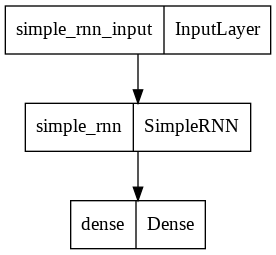

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file="model.png")

### Compile Model

In [ ]:
lr, batchSize, epoch = 1e-3, 1024, 100

In [ ]:
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(learning_rate=lr))

### Train Model

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, validation_data=(xValid, yValid))

Epoch 1/100
8/8 [==============================] - 2s 92ms/step - loss: 0.5843 - val_loss: 0.4278
Epoch 2/100
8/8 [==============================] - 0s 55ms/step - loss: 0.3455 - val_loss: 0.2622
Epoch 3/100
8/8 [==============================] - 0s 55ms/step - loss: 0.2132 - val_loss: 0.1598
Epoch 4/100
8/8 [==============================] - 0s 55ms/step - loss: 0.1347 - val_loss: 0.1033
Epoch 5/100
8/8 [==============================] - 0s 51ms/step - loss: 0.0858 - val_loss: 0.0568
Epoch 6/100
8/8 [==============================] - 0s 56ms/step - loss: 0.0488 - val_loss: 0.0432
Epoch 7/100
8/8 [==============================] - 0s 53ms/step - loss: 0.0362 - val_loss: 0.0361
Epoch 8/100
8/8 [==============================] - 0s 55ms/step - loss: 0.0287 - val_loss: 0.0219
Epoch 9/100
8/8 [==============================] - 0s 53ms/step - loss: 0.0223 - val_loss: 0.0274
Epoch 10/100
8/8 [==============================] - 0s 58ms/step - loss: 0.0244 - val_loss: 0.0421
Epoch 11/100
8/8 [=

### Visualize Training Procedure

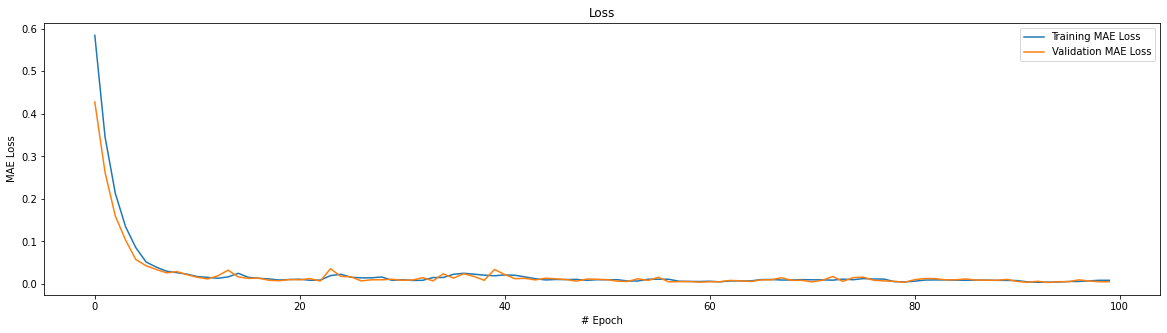

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(np.arange(epoch), history.history["loss"], label="Training MAE Loss")
plt.plot(np.arange(epoch), history.history["val_loss"], label="Validation MAE Loss")
plt.xlabel("# Epoch")
plt.ylabel("MAE Loss")
plt.title("Loss")
plt.legend(loc="best")
plt.show()

### Inference Result

In [ ]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 8ms/step


In [ ]:
yPred.shape

(994, 10)

### Visualize Result

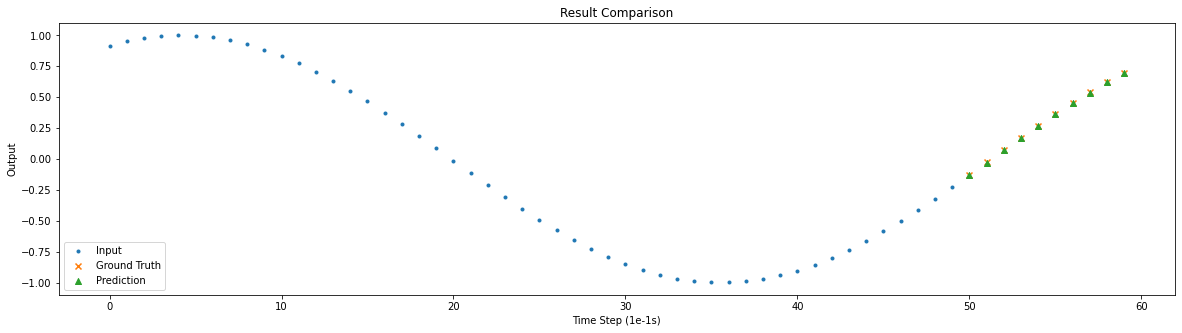

In [ ]:
plt.subplots(figsize = (20,5))
plt.scatter(np.arange(numInput), xTest[-1].reshape(-1), label="Input", marker=".")
plt.scatter(np.arange(numInput, numInput+numOutput), yTest[-1].reshape(-1), label="Ground Truth", marker="x")
plt.scatter(np.arange(numInput, numInput+numOutput), yPred[-1].reshape(-1), label="Prediction", marker="^")
plt.xlabel("Time Step (1e-1s)")
plt.ylabel("Output")
plt.title("Result Comparison")
plt.legend(loc="best")
plt.show()

### Model Evaluation

In [ ]:
def computeMAE(pred, target) :
  return np.abs(pred-target).mean()

In [ ]:
computeMAE(yPred, yTest)

0.005141226338541795

## Create MCK System Class

In [ ]:
class MCKSystem :
  def __init__(self, mass, springStiffness, dampingCoefficient) :
    # Initialize Variable
    self.mass = mass
    self.springStiffness = springStiffness
    self.dampingCoefficient = dampingCoefficient
    
    # Compute Varaible
    self.naturalFrequency = self.computeNaturalFrequency()
    self.dampingRatio = self.computeDampingRatio()
    self.dampedNaturalFrequency = self.computeDampedNaturalFrequency()

  def computeNaturalFrequency(self) :
    return np.sqrt(self.springStiffness/self.mass)  

  def computeDampingRatio(self) :
    return self.dampingCoefficient/(2*self.mass*self.naturalFrequency)

  def computeDampedNaturalFrequency(self) :
    return self.naturalFrequency*np.sqrt(1-np.power(self.dampingRatio, 2))

  def computeDisplacement(self, x0, v0, t) :
    return np.exp(-self.dampingRatio*self.naturalFrequency*t)*(x0*np.cos(self.dampedNaturalFrequency*t) + ((v0+self.dampingRatio*self.naturalFrequency*x0)/self.dampedNaturalFrequency)*np.sin(self.dampedNaturalFrequency*t))

## Create Object Instance

In [ ]:
m, c, k = 1e3, 10, 10
mySystem = MCKSystem(m, c, k)

## Get Initial Condition and Time

In [ ]:
x0, v0 = 0, 1
t = np.arange(0, 1e3, 1e-2)

## Compute Displacement

In [ ]:
x = mySystem.computeDisplacement(x0, v0, t)

## Plot Graph

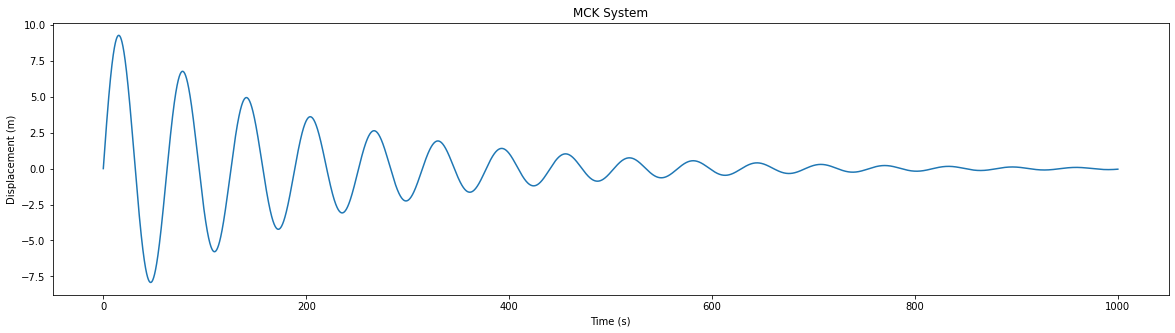

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(t, x)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("MCK System")
plt.show()

## Data Processing for Neural Network

### Get Number of Input

In [ ]:
numInput = 500
numOutput = 50

### Add Data

In [ ]:
inputData, targetData = [], []

for i in range(len(x)-numInput-numOutput) :
  inputData.append(x[i:i+numInput])
  targetData.append(x[i+numInput:i+numInput+numOutput])

In [ ]:
inputData, targetData = np.array(inputData), np.array(targetData)

### Show Dataset

In [ ]:
inputDF = pd.DataFrame(data=inputData, columns=[f"Input_{i}" for i in range(numInput)])
targetDF = pd.DataFrame(data=targetData, columns=[f"Target{i}" for i in range(numOutput)])

In [ ]:
inputDF.head(5)

,Input_0,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Input_7,Input_8,Input_9,...,Input_490,Input_491,Input_492,Input_493,Input_494,Input_495,Input_496,Input_497,Input_498,Input_499
0,0.000000,0.009999,0.019998,0.029995,0.039992,0.049987,0.059982,0.069975,0.079967,0.089958,...,4.592824,4.601204,4.609579,4.617948,4.626312,4.634670,4.643023,4.651371,4.659713,4.668049
1,0.009999,0.019998,0.029995,0.039992,0.049987,0.059982,0.069975,0.079967,0.089958,0.099948,...,4.601204,4.609579,4.617948,4.626312,4.634670,4.643023,4.651371,4.659713,4.668049,4.676380
2,0.019998,0.029995,0.039992,0.049987,0.059982,0.069975,0.079967,0.089958,0.099948,0.109937,...,4.609579,4.617948,4.626312,4.634670,4.643023,4.651371,4.659713,4.668049,4.676380,4.684706
3,0.029995,0.039992,0.049987,0.059982,0.069975,0.079967,0.089958,0.099948,0.109937,0.119925,...,4.617948,4.626312,4.634670,4.643023,4.651371,4.659713,4.668049,4.676380,4.684706,4.693026
4,0.039992,0.049987,0.059982,0.069975,0.079967,0.089958,0.099948,0.109937,0.119925,0.129912,...,4.626312,4.634670,4.643023,4.651371,4.659713,4.668049,4.676380,4.684706,4.693026,4.701340


In [ ]:
targetDF.head(5)

,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9,...,Target40,Target41,Target42,Target43,Target44,Target45,Target46,Target47,Target48,Target49
0,4.676380,4.684706,4.693026,4.701340,4.709649,4.717952,4.726250,4.734543,4.742829,4.751110,...,5.005021,5.013120,5.021213,5.029300,5.037381,5.045456,5.053526,5.061590,5.069648,5.077700
1,4.684706,4.693026,4.701340,4.709649,4.717952,4.726250,4.734543,4.742829,4.751110,4.759386,...,5.013120,5.021213,5.029300,5.037381,5.045456,5.053526,5.061590,5.069648,5.077700,5.085746
2,4.693026,4.701340,4.709649,4.717952,4.726250,4.734543,4.742829,4.751110,4.759386,4.767656,...,5.021213,5.029300,5.037381,5.045456,5.053526,5.061590,5.069648,5.077700,5.085746,5.093786
3,4.701340,4.709649,4.717952,4.726250,4.734543,4.742829,4.751110,4.759386,4.767656,4.775920,...,5.029300,5.037381,5.045456,5.053526,5.061590,5.069648,5.077700,5.085746,5.093786,5.101821
4,4.709649,4.717952,4.726250,4.734543,4.742829,4.751110,4.759386,4.767656,4.775920,4.784179,...,5.037381,5.045456,5.053526,5.061590,5.069648,5.077700,5.085746,5.093786,5.101821,5.109849


### Split Dataset

In [ ]:
trainRatio = 0.8
trainSize = int(inputData.shape[0]*trainRatio)
validSize = (inputData.shape[0]-trainSize)//2

In [ ]:
trainSize

79560

In [ ]:
xTrain, yTrain = inputData[:trainSize], targetData[:trainSize]
xValid, yValid = inputData[trainSize:trainSize+validSize], targetData[trainSize:trainSize+validSize]
xTest, yTest = inputData[trainSize+validSize:], targetData[trainSize+validSize:]

## Recurrent Neural Network (RNN)

### Create RNN Network

In [ ]:
K.clear_session()
fixSeed()

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(50, input_shape=(numInput, 1)))
model.add(keras.layers.Dense(numOutput))

### Summarize Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 5,150
Trainable params: 5,150
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

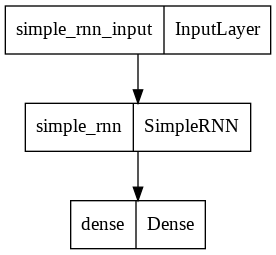

In [ ]:
plot_model(model, to_file="model.png")

### Compile Model

In [ ]:
lr, batchSize, epoch = 1e-3, 2048, 25

In [ ]:
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(learning_rate=lr))

### Train Model

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, validation_data=(xValid, yValid))

Epoch 1/25
39/39 [==============================] - 19s 472ms/step - loss: 1.1308 - val_loss: 0.1678
Epoch 2/25
39/39 [==============================] - 15s 377ms/step - loss: 0.6299 - val_loss: 0.0156
Epoch 3/25
39/39 [==============================] - 14s 357ms/step - loss: 0.3713 - val_loss: 0.0065
Epoch 4/25
39/39 [==============================] - 14s 361ms/step - loss: 0.2338 - val_loss: 0.0060
Epoch 5/25
39/39 [==============================] - 17s 425ms/step - loss: 0.1583 - val_loss: 0.0067
Epoch 6/25
39/39 [==============================] - 14s 361ms/step - loss: 0.1147 - val_loss: 0.0041
Epoch 7/25
39/39 [==============================] - 14s 359ms/step - loss: 0.0884 - val_loss: 0.0038
Epoch 8/25
39/39 [==============================] - 14s 353ms/step - loss: 0.0719 - val_loss: 0.0052
Epoch 9/25
39/39 [==============================] - 14s 355ms/step - loss: 0.0630 - val_loss: 1.1800
Epoch 10/25
39/39 [==============================] - 14s 359ms/step - loss: 0.3270 - val_lo

### Visualize Training Procedure

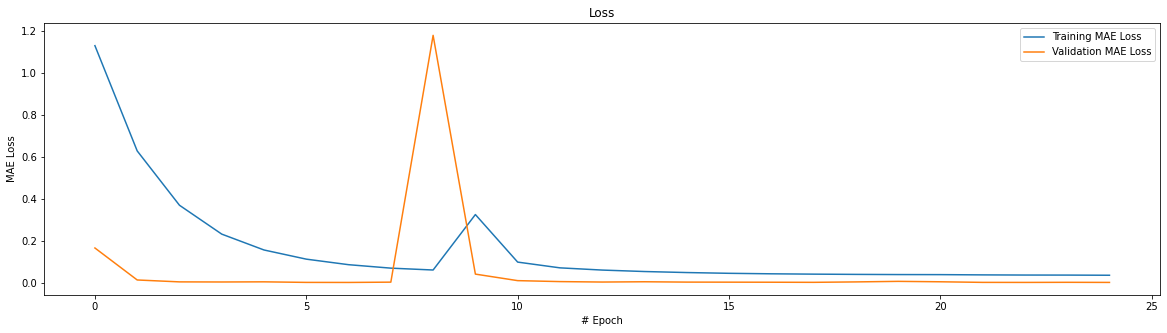

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(np.arange(epoch), history.history["loss"], label="Training MAE Loss")
plt.plot(np.arange(epoch), history.history["val_loss"], label="Validation MAE Loss")
plt.xlabel("# Epoch")
plt.ylabel("MAE Loss")
plt.title("Loss")
plt.legend(loc="best")
plt.show()

### Inference Result

In [ ]:
yPred = model.predict(xTest)

311/311 [==============================] - 11s 36ms/step


In [ ]:
yPred.shape

(9945, 50)

### Visualize Result

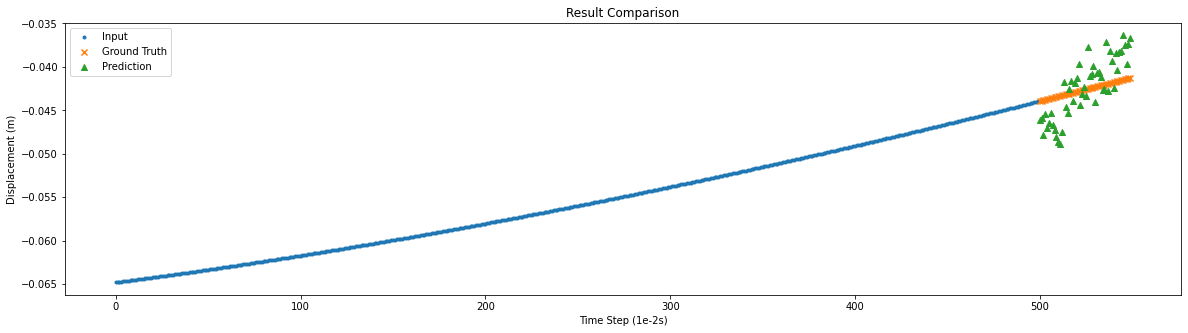

In [ ]:
plt.subplots(figsize = (20,5))
plt.scatter(np.arange(numInput), xTest[-1].reshape(-1), label="Input", marker=".")
plt.scatter(np.arange(numInput, numInput+numOutput), yTest[-1].reshape(-1), label="Ground Truth", marker="x")
plt.scatter(np.arange(numInput, numInput+numOutput), yPred[-1].reshape(-1), label="Prediction", marker="^")
plt.xlabel("Time Step (1e-2s)")
plt.ylabel("Displacement (m)")
plt.title("Result Comparison")
plt.legend(loc="best")
plt.show()

### Model Evaluation

In [ ]:
computeMAE(yPred, yTest)

0.004128486498828533

## Long Short-Term Memory (LSTM)

### Create LSTM Network

In [ ]:
K.clear_session()
fixSeed()

model = keras.Sequential()

model.add(keras.layers.LSTM(50, input_shape=(numInput, 1)))
model.add(keras.layers.Dense(numOutput))

### Summarize Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 12,950
Trainable params: 12,950
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

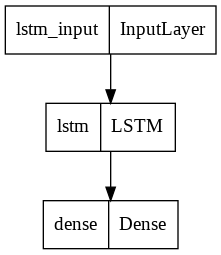

In [ ]:
plot_model(model, to_file="model.png")

### Compile Model

In [ ]:
lr, batchSize, epoch = 1e-3, 2048, 25

In [ ]:
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(learning_rate=lr))

### Train Model

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, validation_data=(xValid, yValid))

Epoch 1/25
39/39 [==============================] - 9s 113ms/step - loss: 1.3214 - val_loss: 0.0301
Epoch 2/25
39/39 [==============================] - 4s 100ms/step - loss: 0.7494 - val_loss: 0.0107
Epoch 3/25
39/39 [==============================] - 4s 97ms/step - loss: 0.4144 - val_loss: 0.0046
Epoch 4/25
39/39 [==============================] - 4s 97ms/step - loss: 0.2530 - val_loss: 0.0037
Epoch 5/25
39/39 [==============================] - 4s 97ms/step - loss: 0.1694 - val_loss: 0.0028
Epoch 6/25
39/39 [==============================] - 4s 99ms/step - loss: 0.1205 - val_loss: 0.0027
Epoch 7/25
39/39 [==============================] - 4s 99ms/step - loss: 0.0928 - val_loss: 0.0024
Epoch 8/25
39/39 [==============================] - 4s 98ms/step - loss: 0.0754 - val_loss: 0.0037
Epoch 9/25
39/39 [==============================] - 4s 98ms/step - loss: 0.0623 - val_loss: 0.0027
Epoch 10/25
39/39 [==============================] - 4s 101ms/step - loss: 0.0530 - val_loss: 0.0043
Epoch 

### Visualize Training Procedure

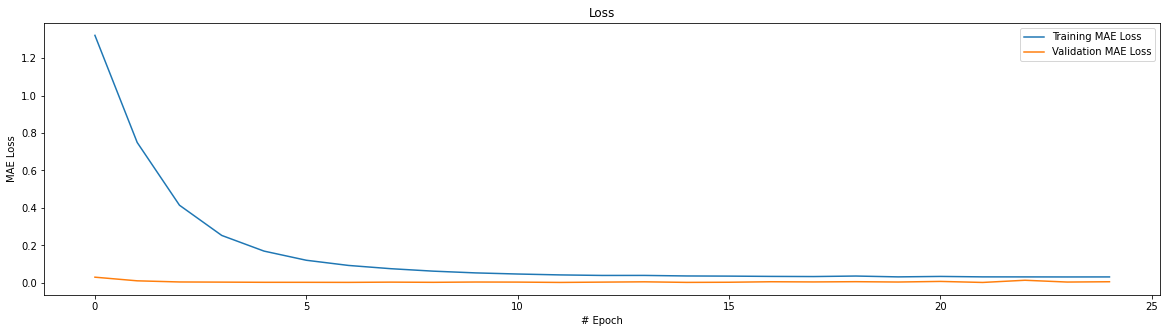

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(np.arange(epoch), history.history["loss"], label="Training MAE Loss")
plt.plot(np.arange(epoch), history.history["val_loss"], label="Validation MAE Loss")
plt.xlabel("# Epoch")
plt.ylabel("MAE Loss")
plt.title("Loss")
plt.legend(loc="best")
plt.show()

### Inference Result

In [ ]:
yPred = model.predict(xTest)

311/311 [==============================] - 2s 7ms/step


In [ ]:
yPred.shape

(9945, 50)

### Visualize Result

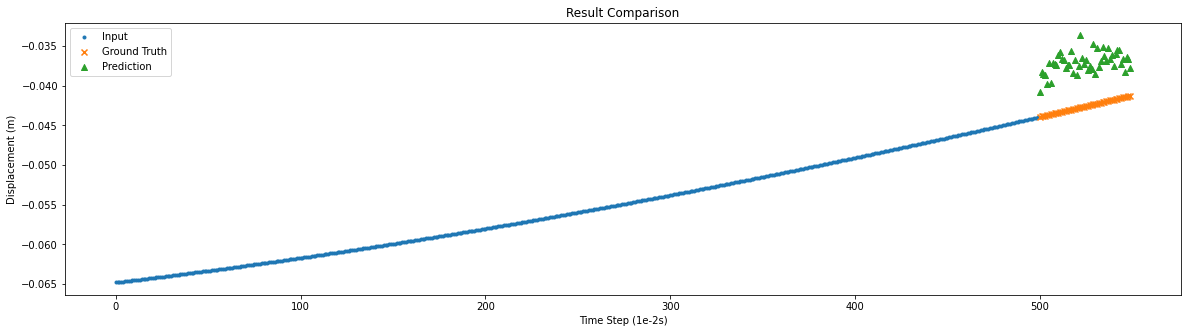

In [ ]:
plt.subplots(figsize = (20,5))
plt.scatter(np.arange(numInput), xTest[-1].reshape(-1), label="Input", marker=".")
plt.scatter(np.arange(numInput, numInput+numOutput), yTest[-1].reshape(-1), label="Ground Truth", marker="x")
plt.scatter(np.arange(numInput, numInput+numOutput), yPred[-1].reshape(-1), label="Prediction", marker="^")
plt.xlabel("Time Step (1e-2s)")
plt.ylabel("Displacement (m)")
plt.title("Result Comparison")
plt.legend(loc="best")
plt.show()

### Model Evaluation

In [ ]:
computeMAE(yPred, yTest)

0.006056845360895551

## Gated Recurrent Unit (GRU)

### Create GRU Network

In [ ]:
K.clear_session()
fixSeed()

model = keras.Sequential()

model.add(keras.layers.GRU(50, input_shape=(numInput, 1)))
model.add(keras.layers.Dense(numOutput))

### Summarize Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

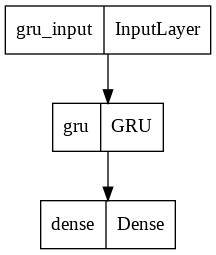

In [ ]:
plot_model(model, to_file="model.png")

### Compile Model

In [ ]:
lr, batchSize, epoch = 1e-3, 2048, 25

In [ ]:
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(learning_rate=lr))

### Train Model

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, validation_data=(xValid, yValid))

Epoch 1/25
39/39 [==============================] - 6s 116ms/step - loss: 1.2857 - val_loss: 0.0744
Epoch 2/25
39/39 [==============================] - 4s 102ms/step - loss: 0.6384 - val_loss: 0.0134
Epoch 3/25
39/39 [==============================] - 4s 103ms/step - loss: 0.3417 - val_loss: 0.0048
Epoch 4/25
39/39 [==============================] - 4s 104ms/step - loss: 0.1952 - val_loss: 0.0043
Epoch 5/25
39/39 [==============================] - 4s 106ms/step - loss: 0.1250 - val_loss: 0.0037
Epoch 6/25
39/39 [==============================] - 4s 106ms/step - loss: 0.0885 - val_loss: 0.0033
Epoch 7/25
39/39 [==============================] - 4s 106ms/step - loss: 0.0674 - val_loss: 0.0031
Epoch 8/25
39/39 [==============================] - 4s 105ms/step - loss: 0.0531 - val_loss: 0.0030
Epoch 9/25
39/39 [==============================] - 4s 106ms/step - loss: 0.0433 - val_loss: 0.0027
Epoch 10/25
39/39 [==============================] - 4s 106ms/step - loss: 0.0370 - val_loss: 0.0027

### Visualize Training Procedure

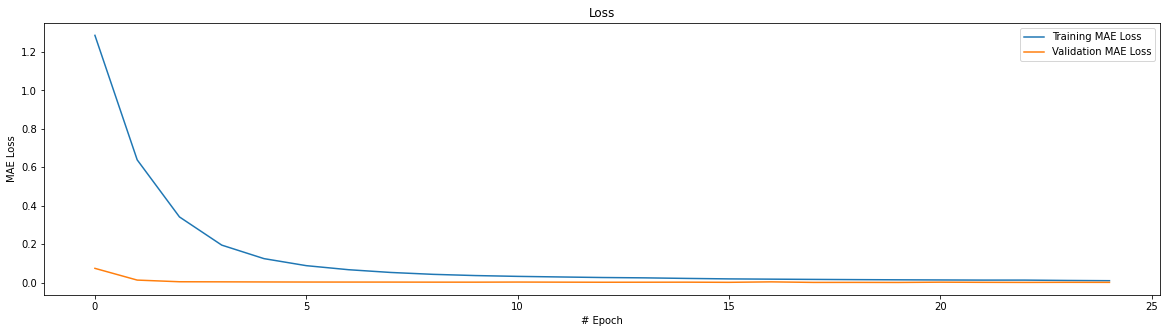

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(np.arange(epoch), history.history["loss"], label="Training MAE Loss")
plt.plot(np.arange(epoch), history.history["val_loss"], label="Validation MAE Loss")
plt.xlabel("# Epoch")
plt.ylabel("MAE Loss")
plt.title("Loss")
plt.legend(loc="best")
plt.show()

### Inference Result

In [ ]:
yPred = model.predict(xTest)

311/311 [==============================] - 2s 7ms/step


In [ ]:
yPred.shape

(9945, 50)

### Visualize Result

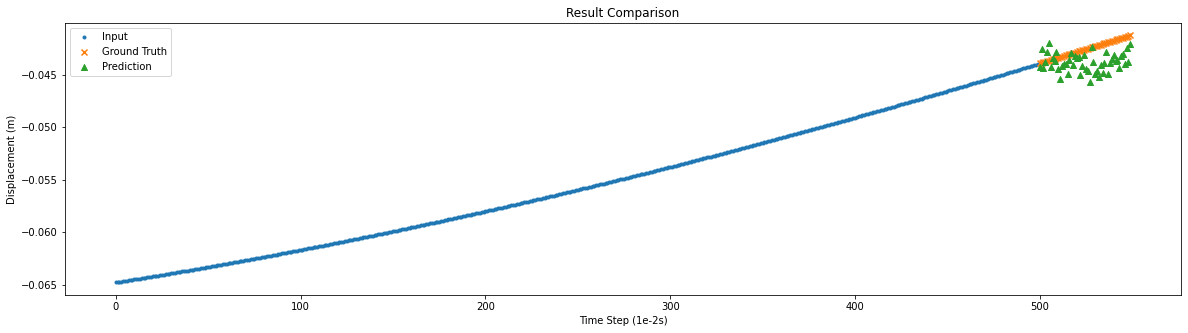

In [ ]:
plt.subplots(figsize = (20,5))
plt.scatter(np.arange(numInput), xTest[-1].reshape(-1), label="Input", marker=".")
plt.scatter(np.arange(numInput, numInput+numOutput), yTest[-1].reshape(-1), label="Ground Truth", marker="x")
plt.scatter(np.arange(numInput, numInput+numOutput), yPred[-1].reshape(-1), label="Prediction", marker="^")
plt.xlabel("Time Step (1e-2s)")
plt.ylabel("Displacement (m)")
plt.title("Result Comparison")
plt.legend(loc="best")
plt.show()

### Model Evaluation

In [ ]:
computeMAE(yPred, yTest)

0.0014888116003982312

## GRU with L2 Regularization

In [ ]:
K.clear_session()
fixSeed()

model = keras.Sequential()

model.add(keras.layers.GRU(50, 
                           input_shape=(numInput, 1), 
                           kernel_regularizer="l2", 
                           recurrent_regularizer="l2",
                           bias_regularizer="l2"))
model.add(keras.layers.Dense(numOutput))

### Summarize Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
Total params: 10,500
Trainable params: 10,500
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

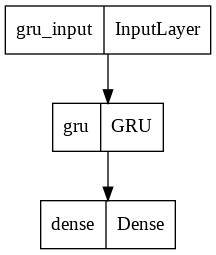

In [ ]:
plot_model(model, to_file="model.png")

### Compile Model

In [ ]:
lr, batchSize, epoch = 1e-3, 2048, 25

In [ ]:
model.compile(loss="mean_absolute_error", optimizer=keras.optimizers.Adam(learning_rate=lr))

### Train Model

In [ ]:
history = model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, validation_data=(xValid, yValid))

Epoch 1/25
39/39 [==============================] - 6s 117ms/step - loss: 0.5225 - val_loss: 0.0517
Epoch 2/25
39/39 [==============================] - 4s 103ms/step - loss: 0.0972 - val_loss: 0.0286
Epoch 3/25
39/39 [==============================] - 4s 101ms/step - loss: 0.0824 - val_loss: 0.0390
Epoch 4/25
39/39 [==============================] - 4s 101ms/step - loss: 0.0730 - val_loss: 0.0274
Epoch 5/25
39/39 [==============================] - 4s 104ms/step - loss: 0.0655 - val_loss: 0.0162
Epoch 6/25
39/39 [==============================] - 4s 103ms/step - loss: 0.0659 - val_loss: 0.0129
Epoch 7/25
39/39 [==============================] - 4s 104ms/step - loss: 0.0640 - val_loss: 0.0325
Epoch 8/25
39/39 [==============================] - 4s 103ms/step - loss: 0.0622 - val_loss: 0.0252
Epoch 9/25
39/39 [==============================] - 4s 104ms/step - loss: 0.0621 - val_loss: 0.0185
Epoch 10/25
39/39 [==============================] - 4s 103ms/step - loss: 0.0586 - val_loss: 0.0229

### Visualize Training Procedure

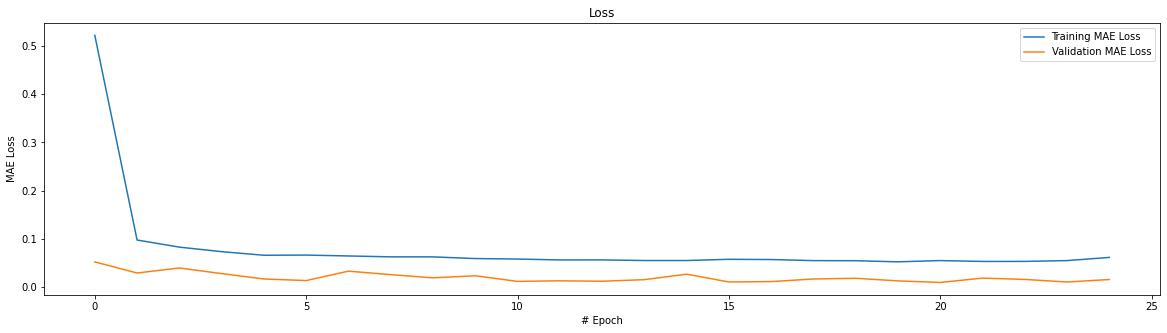

In [ ]:
plt.subplots(figsize = (20,5))
plt.plot(np.arange(epoch), history.history["loss"], label="Training MAE Loss")
plt.plot(np.arange(epoch), history.history["val_loss"], label="Validation MAE Loss")
plt.xlabel("# Epoch")
plt.ylabel("MAE Loss")
plt.title("Loss")
plt.legend(loc="best")
plt.show()

### Inference Result

In [ ]:
yPred = model.predict(xTest)

311/311 [==============================] - 3s 7ms/step


In [ ]:
yPred.shape

(9945, 50)

### Visualize Result

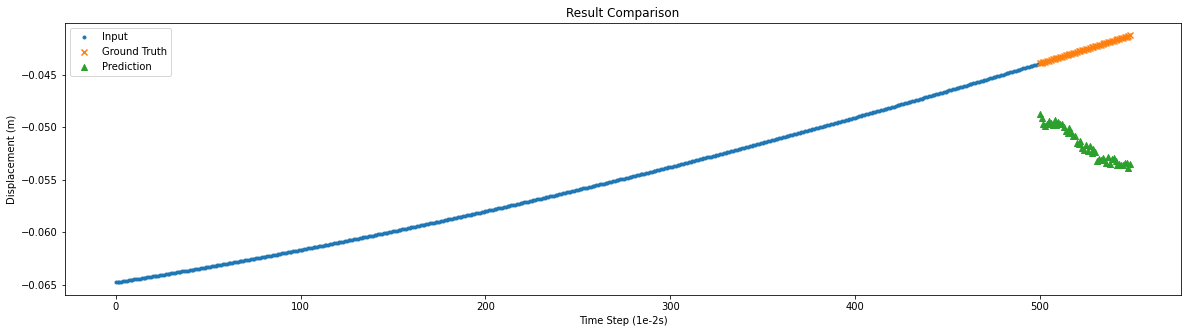

In [ ]:
plt.subplots(figsize = (20,5))
plt.scatter(np.arange(numInput), xTest[-1].reshape(-1), label="Input", marker=".")
plt.scatter(np.arange(numInput, numInput+numOutput), yTest[-1].reshape(-1), label="Ground Truth", marker="x")
plt.scatter(np.arange(numInput, numInput+numOutput), yPred[-1].reshape(-1), label="Prediction", marker="^")
plt.xlabel("Time Step (1e-2s)")
plt.ylabel("Displacement (m)")
plt.title("Result Comparison")
plt.legend(loc="best")
plt.show()

### Model Evaluation

In [ ]:
computeMAE(yPred, yTest)

0.00835036588394002